**Python'da Basit Bir Sinir Ağı Nasıl Oluşturulur**

Temel olarak, bir YSA aşağıdaki bileşenlerden oluşur:


*   Verileri alan ve ileten bir girdi katmanı
*   Gizli bir katman
*   Bir çıktı katmanı
*   Katmanlar arasındaki ağırlıklar
*   Her gizli katman için kasıtlı bir etkinleştirme işlevi. Bu basit sinir ağı Python eğitiminde Sigmoid aktivasyon fonksiyonunu kullanacağız.

Birkaç çeşit sinir ağı vardır. Bu projede ileri beslemeli (feed-forward) veya algılayıcı sinir ağlarını (perception neural networks) oluşturacağız. Bu tür YSA, verileri doğrudan önden arkaya iletir. İleri beslemeli nöronları eğitmek, genellikle ağa karşılık gelen girdi ve çıktı seti sağlayan geri yayılıma ihtiyaç duyar. Girdi verileri nörona iletildiğinde, işlenir ve bir çıktı üretilir.

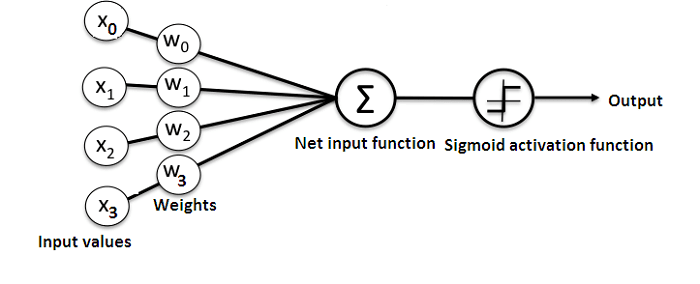

Sinir ağlarının nasıl çalıştığını anlamanın en iyi yolu, sıfırdan (herhangi bir kitaplık kullanmadan) bir tane oluşturmayı öğrenmektir. Bu yazıda, basit bir sinir ağı oluşturmak için Python programlama dilinin nasıl kullanılacağını göstereceğiz.

**Soru :**

İşte uygulamayı gösteren bir tablo.

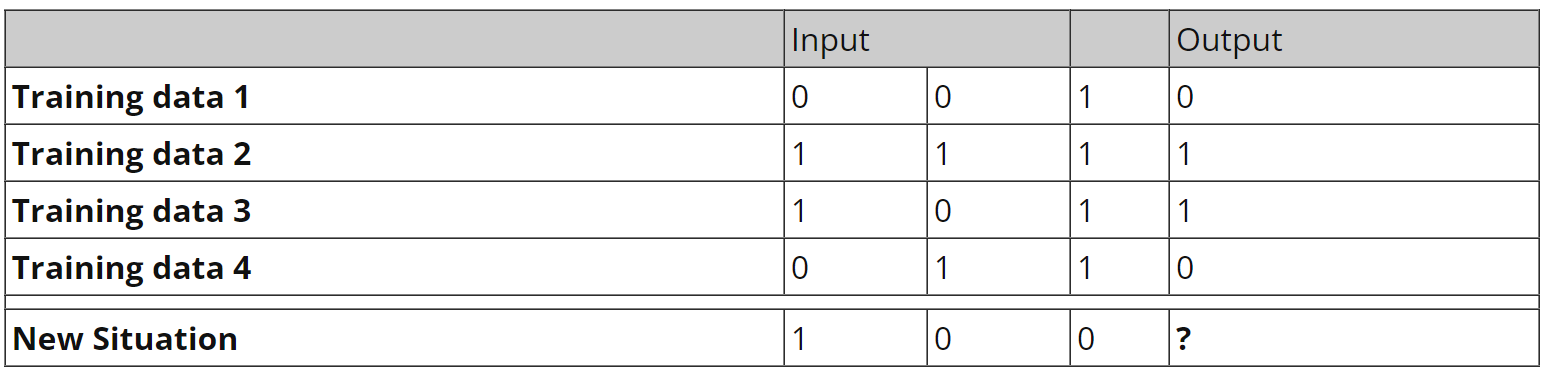

Sinir ağını, yeni bir veri seti sağlandığında doğru çıktı değerini tahmin edebilecek şekilde eğiteceğiz.

Tablodan da görebileceğiniz gibi, çıktının değeri her zaman giriş bölümündeki ilk değere eşittir. Bu nedenle, çıktının (?) değerinin 1 olmasını bekliyoruz. 

**Creating a NeuralNetwork Class**

Nöronu doğru bir tahmin vermesi için eğitmek için Python'da bir NeuralNetwork sınıfı oluşturacağız. Sınıfın başka yardımcı işlevleri de olacaktır. Bu basit sinir ağı örneği için bir sinir ağı kitaplığı kullanmasak da, hesaplamalara yardımcı olması için numpy kitaplığını içe aktaracağız. 

**Kütüphane aşağıdaki dört önemli yöntemle birlikte gelir:**

**exp** : doğal üstel oluşturmak için

**array** : bir matris oluşturmak için

**dot** : matrisleri çarpmak için

**random** : rastgele sayılar üretmek için. Verimli dağılımlarını sağlamak için rastgele sayıları tohumlayacağız.

**Sigmoid işlevini uygulama**

Sinir ağına bir aktivasyon fonksiyonu olarak karakteristik “S” şeklinde bir eğri çizen Sigmoid fonksiyonunu kullanacağız.

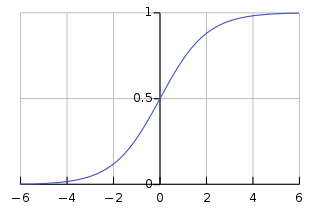

Bu fonksiyon, herhangi bir değeri 0 ile 1 arasında bir değere eşleyebilir. Girdilerin ağırlıklı toplamını normalleştirmemize yardımcı olacaktır.

Daha sonra, ağırlıklardaki temel ayarlamaların hesaplanmasına yardımcı olması için Sigmoid fonksiyonunun türevini oluşturacağız.

Bir Sigmoid fonksiyonunun çıktısı, onun türevini oluşturmak için kullanılabilir. Örneğin, çıktı değişkeni “x” ise türevi x * (1-x) olacaktır.

**Modeli eğitmek**
Bu, sinir ağına doğru bir tahmin yapmayı öğreteceğimiz aşamadır. Her girdinin bir ağırlığı olacaktır - olumlu ya da olumsuz. Bu, çok sayıda pozitif ağırlığa veya çok sayıda negatif ağırlığa sahip bir girdinin ortaya çıkan çıktıyı daha fazla etkileyeceği anlamına gelir. Başlangıçta her ağırlığı rastgele bir sayıya atayarak başladığımızı unutmayın. 

Bu sinir ağı örnek probleminde kullandığımız eğitim süreci için prosedür:

1. Eğitim veri setinden girdileri aldık, ağırlıklarına göre bazı ayarlamalar yapılır ve YSA'nın çıktısını hesaplayan bir yöntemle bunları çektik.
2. Geriye yayılan hata oranını hesapladık. Bu durumda, nöronun tahmin edilen çıktısı ile eğitim veri setinin beklenen çıktısı arasındaki farktır.
3. Alınan hatanın boyutuna bağlı olarak, Hata Ağırlıklı Türev (Error Weighted Derivative) formülünü kullanarak bazı küçük ağırlık ayarlamaları yaptık.
4. Bu işlemi 15.000 kez yineledik. Her yinelemede, tüm eğitim seti aynı anda işlenir.

Matrisin yatay konumdan dikey konuma aktarılması için “.T” fonksiyonunu kullandık. Bu nedenle, sayılar şu şekilde saklanacaktır:

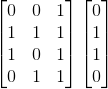


Sonuç olarak, sağlanan eğitim verileri için nöronun ağırlıkları optimize edilecektir. Nörona bir öncekinin aynısı olan yeni bir durum hakkında düşündürürse, doğru bir tahminde bulunabilir. Geri yayılım bu şekilde gerçekleşir.


In [1]:
import numpy as np 
# seeding for random number generation
np.random.seed(1) 
#converting weights to a 3 by 1 matrix with values from -1 to 1 and mean of 0
synaptic_weights = 2 * np.random.random((3, 1)) - 1

In [2]:
def sigmoid(x):
    #applying the sigmoid function
    return 1 / (1 + np.exp(-x))

In [3]:
def sigmoid_derivative(x):
    #computing derivative to the Sigmoid function
    return x * (1 - x)

In [4]:
def train(training_inputs, training_outputs, training_iterations):
    global synaptic_weights
    #training the model to make accurate predictions while adjusting weights continually
    for iteration in range(training_iterations):
        #siphon the training data via  the neuron
        output = think(training_inputs)

        #computing error rate for back-propagation
        error = training_outputs - output
            
        #performing weight adjustments
        adjustments = np.dot(training_inputs.T, error * sigmoid_derivative(output))

        synaptic_weights += adjustments 

In [5]:
def think(inputs):
    #passing the inputs via the neuron to get output   
    #converting values to floats
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, synaptic_weights))
    return output

In [6]:
print("Beginning Randomly Generated Weights: ")
print(synaptic_weights)

#training data consisting of 4 examples--3 input values and 1 output
training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1]])
training_outputs = np.array([[0,1,1,0]]).T

#training taking place
train(training_inputs, training_outputs, 15000) 

print("Ending Weights After Training: ")
print(synaptic_weights)

user_input_one = str(input("User Input One: "))
user_input_two = str(input("User Input Two: "))
user_input_three = str(input("User Input Three: "))
    
print("Considering New Situation: ", user_input_one, user_input_two, user_input_three)
print("New Output data: ")
print(think(np.array([user_input_one, user_input_two, user_input_three])))
print("Wow, we did it!")

Beginning Randomly Generated Weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Ending Weights After Training: 
[[10.08740896]
 [-0.20695366]
 [-4.83757835]]
User Input One: 1
User Input Two: 0
User Input Three: 0
Considering New Situation:  1 0 0
New Output data: 
[0.9999584]
Wow, we did it!


In [7]:
#https://www.kdnuggets.com/2018/10/simple-neural-network-python.html

Nöron, kendisine bazı rasgele ağırlıklar tahsis ederek başladı. Daha sonra eğitim örneklerini kullanarak kendini eğitmiştir.

Sonuç olarak yeni bir durum [1,0,0] ile sunulduğunda 0,9999584 değerini vermiştir.

İstediğimiz doğru cevap 1'dir. O halde, Sigmoid fonksiyonunun 0 ile 1 arasında değerler verdiği göz önüne alındığında, bu çok değer 1'e çok yakındır.